In [486]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

In [487]:
df_base = pd.read_csv('StudentsPerformance.csv')
df_base.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [488]:
df_base.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [489]:
for i in df_base.columns:
    print(i)
    print(df_base[i].unique())
    print()

gender
['female' 'male']

race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch
['standard' 'free/reduced']

test preparation course
['none' 'completed']

math score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

reading score
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]

writing score
[ 74  88  93  44  75  

In [490]:
df = df_base.copy()
# Преобразуем значения в бинарные
df.loc[df['gender'] == 'female', 'gender'] = 1
df.loc[df['gender'] == 'male', 'gender'] = 0
df.loc[df['lunch'] == 'standard', 'lunch'] = 1
df.loc[df['lunch'] == 'free/reduced', 'lunch'] = 0
df.loc[df['test preparation course'] == 'completed', 'test preparation course'] = 1
df.loc[df['test preparation course'] == 'none', 'test preparation course'] = 0
df = pd.get_dummies(df, columns=['parental level of education', 'race/ethnicity'])
for i in df.columns:
    print(i, type(df.loc[0,i]))
    df[i] = df[i].astype('float32')
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

gender <class 'int'>
lunch <class 'int'>
test preparation course <class 'int'>
math score <class 'numpy.int64'>
reading score <class 'numpy.int64'>
writing score <class 'numpy.int64'>
parental level of education_associate's degree <class 'numpy.bool_'>
parental level of education_bachelor's degree <class 'numpy.bool_'>
parental level of education_high school <class 'numpy.bool_'>
parental level of education_master's degree <class 'numpy.bool_'>
parental level of education_some college <class 'numpy.bool_'>
parental level of education_some high school <class 'numpy.bool_'>
race/ethnicity_group A <class 'numpy.bool_'>
race/ethnicity_group B <class 'numpy.bool_'>
race/ethnicity_group C <class 'numpy.bool_'>
race/ethnicity_group D <class 'numpy.bool_'>
race/ethnicity_group E <class 'numpy.bool_'>


,gender,lunch,test preparation course,math score,reading score,writing score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
gender,1.000000,-0.021372,-0.006028,-0.167982,0.244313,0.301225,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,-0.071001,0.028466,0.063368,-0.030566,-0.020302
lunch,-0.021372,1.000000,-0.017044,0.350877,0.229560,0.245769,0.009102,-0.013668,-0.002211,-0.027095,0.006146,0.013874,-0.032329,-0.008257,-0.003385,-0.009458,0.052398
test preparation course,-0.006028,-0.017044,1.000000,0.177702,0.241780,0.312946,0.012668,0.024285,-0.074446,-0.009933,-0.019490,0.070289,-0.006315,-0.000106,0.012522,-0.055956,0.059393
math score,-0.167982,0.350877,0.177702,1.000000,0.817580,0.802642,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,-0.091977,-0.084250,-0.073387,0.050071,0.205855
reading score,0.244313,0.229560,0.241780,0.817580,1.000000,0.954598,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.096274,-0.060283,-0.003074,0.035177,0.106712
writing score,0.301225,0.245769,0.312946,0.802642,0.954598,1.000000,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.110714,-0.078254,-0.010203,0.082032,0.089077
parental level of education_associate's degree,0.004835,0.009102,0.012668,0.063228,0.064386,0.064799,1.000000,-0.195386,-0.263746,-0.133757,-0.288649,-0.249426,-0.048658,-0.007238,0.037077,-0.044674,0.054922
parental level of education_bachelor's degree,0.011638,-0.013668,0.024285,0.079664,0.096024,0.128297,-0.195386,1.000000,-0.180595,-0.091588,-0.197647,-0.170790,0.016307,-0.019121,0.015682,-0.020556,0.013221
parental level of education_high school,-0.037952,-0.002211,-0.074446,-0.128725,-0.151068,-0.182211,-0.263746,-0.180595,1.000000,-0.123632,-0.266799,-0.230545,0.004919,0.069093,0.007977,-0.042118,-0.039494
parental level of education_master's degree,0.046188,-0.027095,-0.009933,0.060417,0.106452,0.125693,-0.133757,-0.091588,-0.123632,1.000000,-0.135305,-0.116919,-0.033551,-0.056363,0.001630,0.072793,-0.003180


In [491]:
df.columns

Index(['gender', 'lunch', 'test preparation course', 'math score',
       'reading score', 'writing score',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school',
       'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E'],
      dtype='object')

In [492]:
x = df[['lunch', 'test preparation course', 'math score',
       'reading score', 'writing score',
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       'parental level of education_high school',
       "parental level of education_master's degree",
       'parental level of education_some college',
       'parental level of education_some high school',
       'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E']]
y = df['gender']

In [508]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) # , random_state=13

In [494]:
print(
    "Using %d samples for training and %d for validation"
    % (len(x_train), len(x_test))
)

Using 750 samples for training and 250 for validation


In [495]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(16, activation="relu"),
#     tf.keras.layers.Dense(30, activation="relu"),
#     # tf.keras.layers.Dense(30, activation="relu"),
#     tf.keras.layers.Dense(1, activation="sigmoid")
# ])
# model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.binary_crossentropy, "accuracy"])

# lr_cb = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10**(epoch/15)))

# history = model.fit(x_train, y_train, epochs=50, verbose=1,  callbacks=[lr_cb])

In [496]:
# hist = pd.DataFrame(history.history).drop("binary_crossentropy", axis=1)
# hist.plot()

In [497]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    # tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1.19), metrics=[tf.keras.metrics.binary_crossentropy, "accuracy"])
lr_cb = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10**(epoch/15)))
history = model.fit(x_train, y_train, epochs=50, verbose=1,  callbacks=[lr_cb])

Epoch 1/50


24/24 [==============================] - 1s 1ms/step - loss: 15.8063 - binary_crossentropy: 15.8063 - accuracy: 0.4813 - lr: 1.0000e-04
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 14.1708 - binary_crossentropy: 14.1708 - accuracy: 0.4813 - lr: 1.1659e-04
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 12.2873 - binary_crossentropy: 12.2873 - accuracy: 0.4813 - lr: 1.3594e-04
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 10.1365 - binary_crossentropy: 10.1365 - accuracy: 0.4813 - lr: 1.5849e-04
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 7.6072 - binary_crossentropy: 7.6072 - accuracy: 0.4813 - lr: 1.8478e-04
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 4.2932 - binary_crossentropy: 4.2932 - accuracy: 0.4813 - lr: 2.1544e-04
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 1.1581 - binary_crossentropy: 1.1581 - accuracy: 0.4760 - lr:

<Axes: >

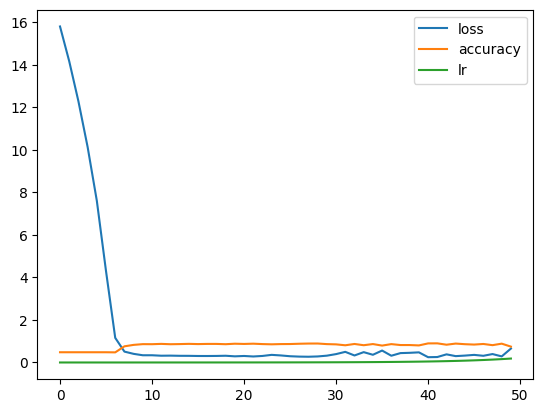

In [498]:
hist = pd.DataFrame(history.history).drop("binary_crossentropy", axis=1)
hist.plot()

In [499]:
# model.save("Students.h5")

In [500]:
model1 = keras.models.load_model("Students.h5")

In [501]:
from sklearn.metrics import *

8/8 [==============================] - 0s 1ms/step


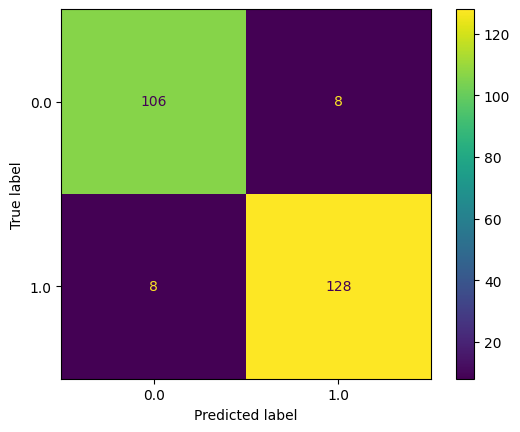

In [509]:
y_pred_NN = np.round(model1.predict(x_test)[:, 0])
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_NN);

In [503]:
def metrics(y_test, y_pred):
    f1 = f1_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    return f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1: {f1}"  
metrics(y_test, y_pred_NN)

'Accuracy: 0.888, Precision: 0.8976377952755905, Recall: 0.8837209302325582, F1: 0.8906249999999999'

In [504]:
test = np.round(model1.predict(x_test.iloc[[10]])[:, 0])
test

1/1 [==============================] - 0s 23ms/step


array([0.], dtype=float32)

In [505]:
y_test.iloc[[1]]

536    0.0
Name: gender, dtype: float32